# **Supervised Learning**

**Data Description**

1. CustomerID : Unique customer ID
2. ProdTaken : Whether the product is taken (1) or not (0)
3. Age : Age of the customer
4. TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
5. CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch : Duration of the pitch by a salesperson to the customer
7. Occupation : Occupation of customer
8. Gender : Gender of customer
9. NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
10. NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched : Product pitched by the salesperson
12. PreferredPropertyStar : Preferred hotel property rating by customer
13. MaritalStatus : Marital status of customer
14. NumberOfTrips : Average number of trips in a year by customer
15. Passport : The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore : Sales pitch satisfaction score
17. OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
19. Designation : Designation of the customer in the current organization
20. MonthlyIncome : Gross monthly income of the customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Google Colab/preprocessed_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Google Colab/preprocessed_test.csv')

In [ ]:
train.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,MarketingCost,Occupation:Large Business,Occupation:Salaried,ProductPitched:Deluxe,ProductPitched:King,ProductPitched:Super Deluxe,MaritalStatus:Married,MaritalStatus:Single,Designation:Executive,Designation:Manager,Designation:VP,AgeStructure:Prime working age
0,0.0,-0.171019,1.0,3.0,-1.162194,1.0,-2.693587,5.0,-0.673531,0.0,4.0,-0.244061,-1.415815,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,-0.171019,1.0,1.0,-0.914522,1.0,-0.703231,3.0,-0.673531,0.0,5.0,-1.002411,-0.919053,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,-0.280484,0.0,1.0,-0.666850,1.0,0.291947,3.0,-0.673531,0.0,2.0,0.578047,-0.477486,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.047911,1.0,1.0,1.314528,1.0,0.291947,4.0,1.520339,0.0,4.0,-0.362243,1.288782,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.047911,1.0,1.0,-1.162194,0.0,-0.703231,5.0,0.423404,0.0,2.0,-1.172831,-1.084640,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## **Splitting Data**

Splitting dataset menjadi training dan testing set telah dilakukan pada tahap preprocessing data dengan rasio 8:2. Selanjutnya masing-masing set dibagi menjadi X_train, y_train, X_test, dan y_test. y_train, y_test merupakan target kolom, yaitu ProdTaken. X_train dan X_test tidak mengikutsertakan feature 'DurationOfPitch', 'Designation:Manager', 'Designation:VP', dan 'MaritalStatus:Married' karena feature tersebut mempunyai korelasi yang kuat (>= 0.7) antar feature yang lain.

In [ ]:
y_train = train.ProdTaken
X_train = train.drop(['ProdTaken', 'DurationOfPitch', 'Designation:Manager', 'Designation:VP','MaritalStatus:Married'], axis= 1)

y_test = test.ProdTaken
X_test = test.drop(['ProdTaken', 'DurationOfPitch', 'Designation:Manager', 'Designation:VP','MaritalStatus:Married'], axis= 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6186, 19), (1584, 19), (6186,), (1584,))

In [ ]:
X_train.columns

Index(['Age', 'TypeofContact', 'CityTier', 'Gender', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'MonthlyIncome', 'MarketingCost',
       'Occupation:Large Business', 'Occupation:Salaried',
       'ProductPitched:Deluxe', 'ProductPitched:King',
       'ProductPitched:Super Deluxe', 'MaritalStatus:Single',
       'Designation:Executive', 'AgeStructure:Prime working age'],
      dtype='object')

## **Modeling**

Dalam kasus ini, permasalahan yang dihadapi oleh company adalah strategi marketing yang tidak efektif. Ineffective marketing akan mengakibatkan biaya yang lebih tinggi daripada yang seharusnya. Pemodelan ini bertujuan untuk memprediksi potensial customer untuk memimalkan cost akibat dari kesalahan pitching ke customer yang tidak potensial. Namun, tim marketing juga tidak ingin kehilangan peluang yang terlalu besar dari ketatnya prediksi potensial customer. Oleh karena itu nilai error type I dan error error type II sama-sama dipertimbangkan. Untuk pemilihan model terbaik akan didasarkan pada metric Precision yang paling tinggi. Hasil learning pada training set akan divalidasi menggunakan teknik K-fold Cross Validation. Hyperparameter tuning pada logistic regression, KNN, dan XGBoost model tidak dapat mengatasi overfitting maupun meningkatkan performa model.

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

In [ ]:
# cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))


def evaluate_prediction(y_test, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_test, y_pred) * 100

  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
  model_evaluation = {"accuracy": model_accuracy,
                      "precision": model_precision,
                      "recall": model_recall,
                      "f1": model_f1}
  return model_evaluation

### **Logistic Regression**

Alasan penggunaan algoritma:
1. Target kolom berupa kategori biner
2. Tidak terdapat ekstrem outiler yang sangat berpengaruh ke hasil prediksi.
3. Feature tidak multikolinear
4. Ukuran sampel besar (> 500)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.8314454819475944

In [ ]:
# Fit the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)
eval_classification(model_lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.73

Precision (Test Set): 0.73
Recall (Test Set): 0.74
F1-Score (Test Set): 0.73
AUC: 0.73


In [ ]:
model_lr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logistic_evaluation = evaluate_prediction(y_test, y_pred)

### **KNN**
Alasan penggunaan algoritma:
1. Algoritma sederhana
2. Dapat digunakan pada data yang bersifat non linier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
scores = cross_val_score(model_knn, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9818191875916006

In [ ]:
# Fit the model
model_knn.fit(X_train, y_train)

# Make predictions
y_pred = model_knn.predict(X_test)
eval_classification(model_knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.83

Precision (Test Set): 0.80
Recall (Test Set): 0.87
F1-Score (Test Set): 0.83
AUC: 0.83


In [ ]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Hyperparameter Tuning**

In [ ]:
%%time
# List of hyperparameter
n_neighbors = list(range(4,16)) # int(math.sqrt(X_train.shape[0]))
leaf_size = list(range(10,150))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, leaf_size=leaf_size, algorithm=algorithm)

knn = KNeighborsClassifier()
model_knn = RandomizedSearchCV(knn, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
eval_classification(model_knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.87

Precision (Test Set): 0.87
Recall (Test Set): 0.87
F1-Score (Test Set): 0.87
AUC: 0.87
CPU times: user 33.3 s, sys: 214 ms, total: 33.5 s
Wall time: 34.3 s


In [ ]:
model_knn.best_estimator_.get_params()

{'algorithm': 'brute',
 'leaf_size': 149,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
knn_evaluation = evaluate_prediction(y_test, y_pred)

### **Decision Tree**

Alasan menggunakan algoritma tree-based:
1. Feature lebih banyak kategorikal
2. Dapat memberikan performa yang baik pada data non linier
3. Alur pengambilan decision dapat divisualisasikan

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model_dt, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9271999762988988

In [ ]:
# Fit the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.83

Precision (Test Set): 0.86
Recall (Test Set): 0.80
F1-Score (Test Set): 0.83
AUC: 0.83


In [ ]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Hyperparameter Tuning**

In [ ]:
%%time
# List of hyperparameter
max_depth = [3,4,5] # Maximum number of levels in tree
min_samples_split = [20,30, 40, 50, 75, 100] # Minimum number of samples required to split a node
min_samples_leaf = [ 20,30, 40, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt = RandomizedSearchCV(dt, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')
model_dt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt.predict(X_test)
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.73

Precision (Test Set): 0.75
Recall (Test Set): 0.68
F1-Score (Test Set): 0.71
AUC: 0.73
CPU times: user 2.02 s, sys: 4.46 ms, total: 2.03 s
Wall time: 2.03 s


In [ ]:
model_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

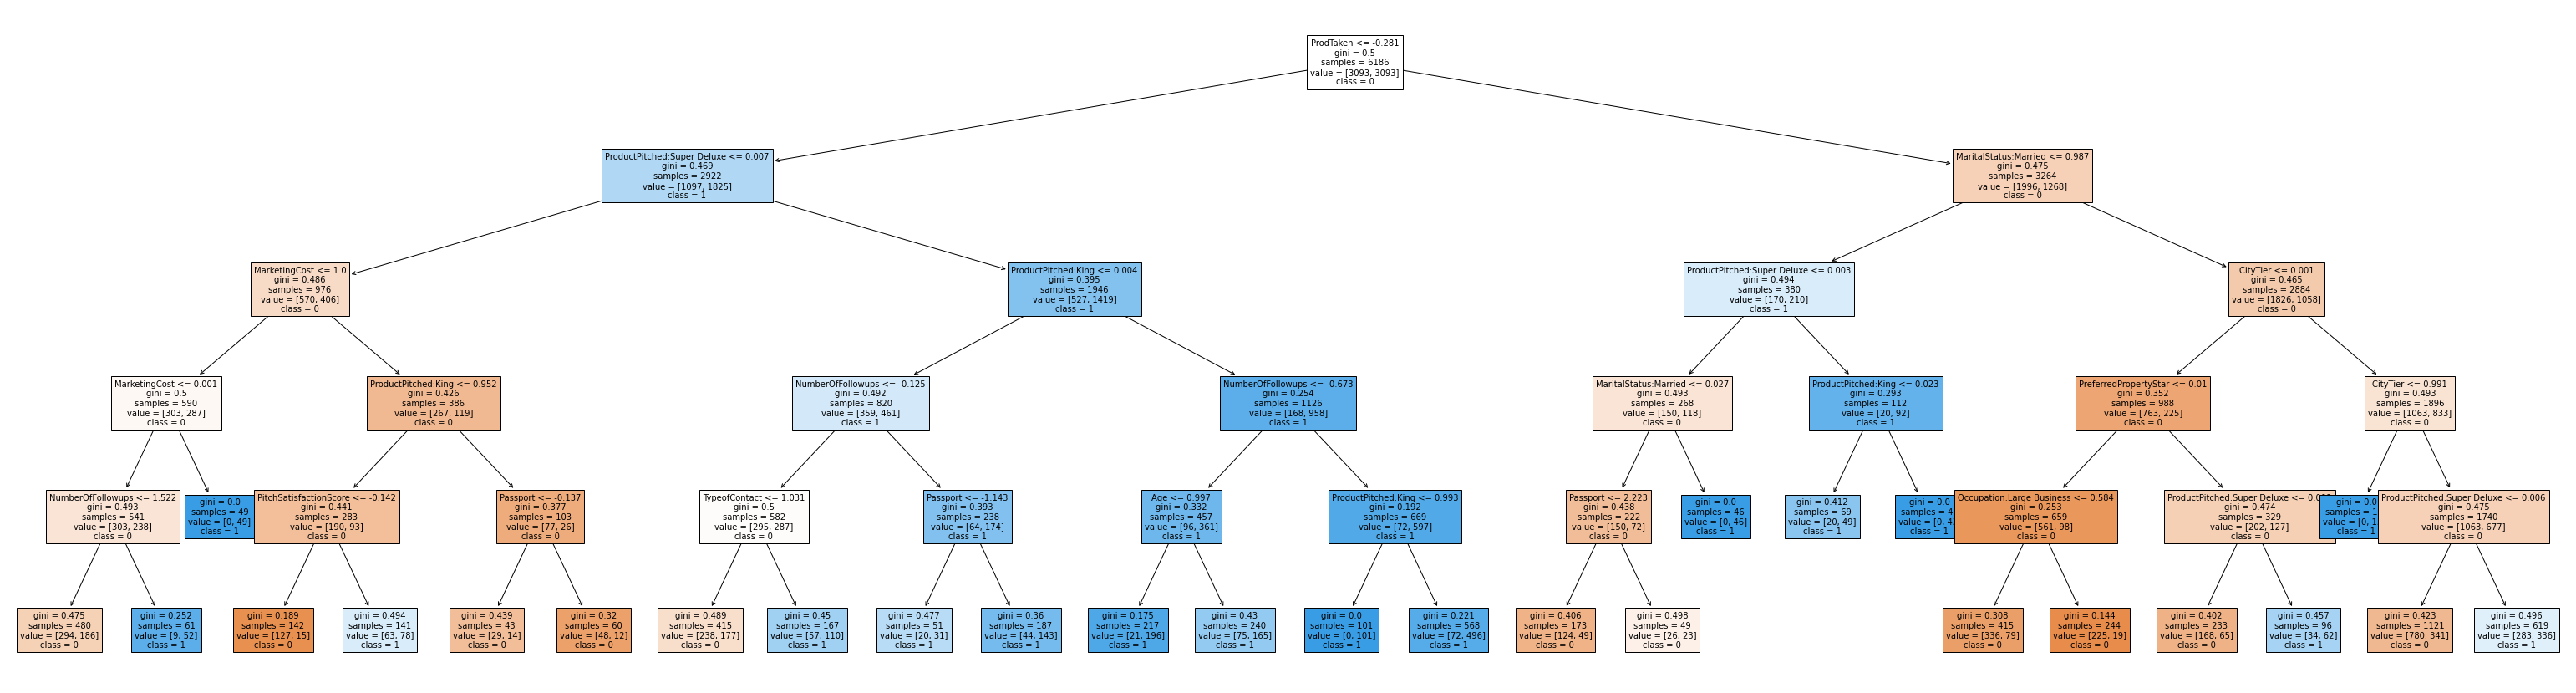

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(55,15))
tree.plot_tree(model_dt.best_estimator_,
               feature_names = train.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
decisiontree_evaluation = evaluate_prediction(y_test, y_pred)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42) 
scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9945822094884266

In [ ]:
# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92

Precision (Test Set): 0.97
Recall (Test Set): 0.87
F1-Score (Test Set): 0.92
AUC: 0.92


In [ ]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Hyperparameter Tuning**

In [ ]:
%%time
# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)]
max_depth = [3] 
min_samples_split = [20,30, 40, 50, 75, 100] 
min_samples_leaf = [10, 20, 30, 40, 50] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       n_estimators=n_estimators,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model_rf = RandomizedSearchCV(rf, hyperparameters, cv=cv, random_state=42, scoring='roc_auc', n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.81

Precision (Test Set): 0.82
Recall (Test Set): 0.79
F1-Score (Test Set): 0.80
AUC: 0.81
CPU times: user 2.63 s, sys: 359 ms, total: 2.99 s
Wall time: 1min 24s


In [ ]:
model_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
random_forest_evaluation = evaluate_prediction(y_test, y_pred)

### **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='roc_auc', cv=cv)
scores.mean()

0.953458280204411

In [ ]:
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
eval_classification(model_xgb, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.86

Precision (Test Set): 0.86
Recall (Test Set): 0.85
F1-Score (Test Set): 0.86
AUC: 0.86


In [ ]:
model_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgboost_evaluation = evaluate_prediction(y_test, y_pred)

**Hyperparameter Tuning**

In [ ]:
%%time
param_grid = {'max_depth': [2, 3],
             'learning_rate': [0.3, 0.2, 0.1, 0.05],
             'gamma': [0, 0.25, 0.5, 1.0],
             'reg_lambda':[0, 1.0, 2.0, 5.0, 10.0],
             'scale_pos_weight':[1,3,5],
             'min_child_weight':[1,3,5]}

# Inisialisasi Model
xgb = XGBClassifier(objective='binary:logistic', subsample=1, colsample_bytree=1, verbosity=1, random_state=42)
optimal_params = RandomizedSearchCV(xgb, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

optimal_params.fit(X_train, y_train)

# Predict & Evaluation
y_pred = optimal_params.predict(X_test)
eval_classification(optimal_params, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.80

Precision (Test Set): 0.74
Recall (Test Set): 0.94
F1-Score (Test Set): 0.83
AUC: 0.80
CPU times: user 1.76 s, sys: 279 ms, total: 2.04 s
Wall time: 48.2 s


In [ ]:
optimal_params.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.5,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 3,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

## **Model Comparison**

In [ ]:
model_evaluations = pd.DataFrame({"logistic": logistic_evaluation,
                                  "knn": knn_evaluation,
                                  "decision_tree": decisiontree_evaluation,
                                  "random_forest":random_forest_evaluation,
                                  "xgboost": xgboost_evaluation}).T
model_evaluations

,accuracy,precision,recall,f1
logistic,73.042929,0.730512,0.730429,0.730405
knn,87.373737,0.873740,0.873737,0.873737
decision_tree,72.790404,0.730313,0.727904,0.727191
random_forest,80.618687,0.806657,0.806187,0.806113
xgboost,85.732323,0.857469,0.857323,0.857309


In [ ]:
# Scale the accuracy values
model_evaluations["accuracy"] = model_evaluations["accuracy"]/100 

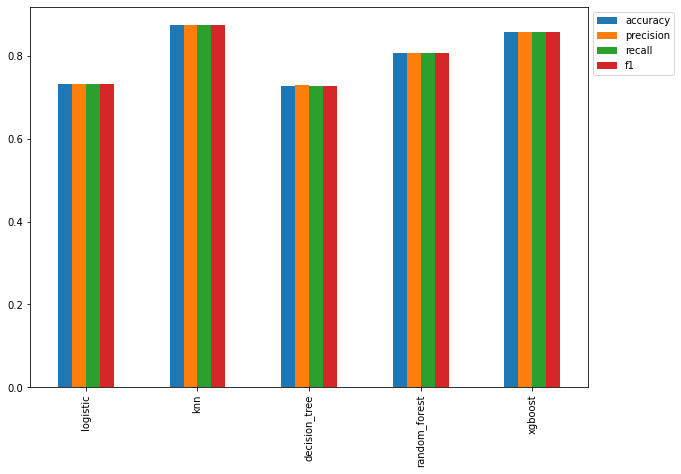

In [ ]:
# Plot model evaluation metrics
model_evaluations.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1,1)) 

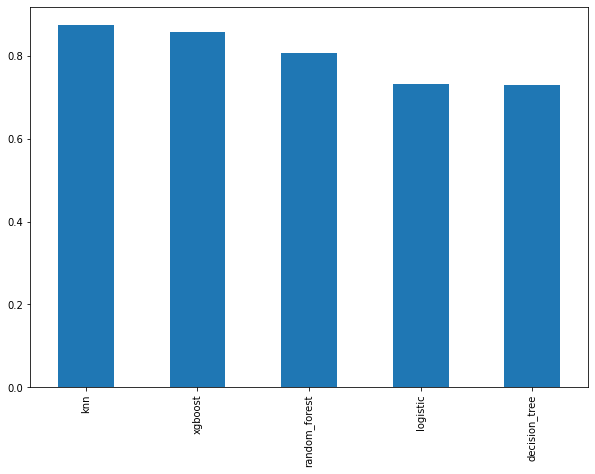

In [ ]:
# Sort model evaluation by precision metric
model_evaluations.sort_values("precision", ascending=False)["precision"].plot(kind="bar", figsize=(10,7)) 

Model KNN gagal dipilih sebagai model terbaik meskipun nilai metric precision tertinggi karena model KNN mengalami overfitting. Oleh karena itu, Model XGBoost menjadi model best fit yang terbaik.

## **Final Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(model_xgb.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(model_xgb.score(X_test[X_train.columns], y_test)))

y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.89
Accuracy of XGB classifier on test set: 0.86
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       792
         1.0       0.86      0.85      0.86       792

    accuracy                           0.86      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.86      0.86      0.86      1584



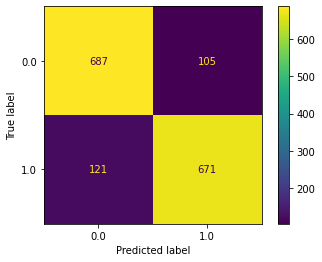

In [ ]:
plot_confusion_matrix(model_xgb,
                     X_test,
                     y_test,
                     values_format='d')

In [ ]:
pip install shap

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(model_xgb.predict, X_test)
# Calculates the SHAP values
shap_values = explainer(X_test)

Permutation explainer: 1585it [04:34,  5.72it/s]


In [ ]:
# Force plot untuk kelas 0  / ProdTaken=0
shap.initjs()
shap.plots.force(shap_values[1])

In [ ]:
# Force plot untuk kelas 1 / ProdTaken=1
shap.initjs()
shap.plots.force(shap_values[0])

Calon customer yang memiliki passport, bekerja sebagai Executive, berstatus lajang, dan tidak memilih produk Deluxe berkontribusi meningkatkan prediksi terjualnya paket liburan (ProdTaken=1) pada model. Sedangkan calon customer yang tinggal di kawasan City Tier 1 berkontribusi menurunkan prediksi model.

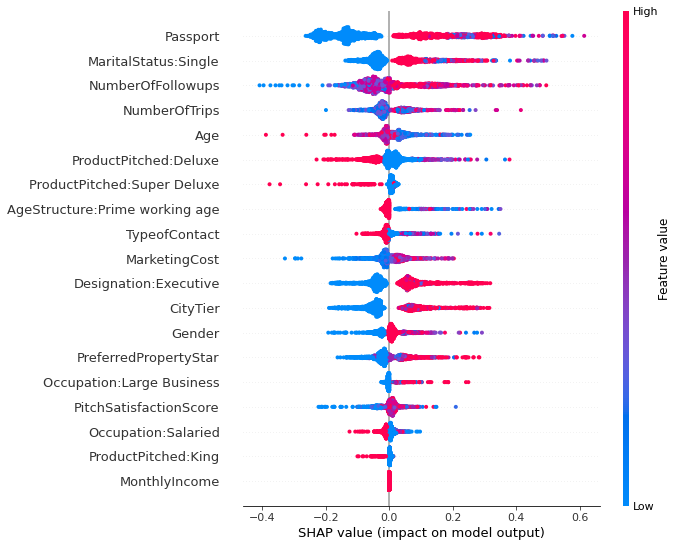

In [ ]:
# Beeswarm plot 
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=27)

1. Calon customer yang memiliki Passport (`Passport`=1), berstatus lajang (`MaritalStatus`=Single), dan frekuensi follow up pitching tinggi memberikan pengaruh paling besar pada prediksi terjualnya paket liburan (`ProdTaken`=1).
2. Terdapat beberapa case di mana semakin tinggi usia calon customer (`Age`), prediksi terjualnya paket liburan (`ProdTaken`=1) semakin menurun.
3. Pemilihan paket Deluxe dan Super Deluxe sebagian besar menurunkan prediksi terjualnya paket liburan (ProdTaken=1).
4. Calon customer yang memiliki pekerjaan sebagai Executive (`Designation`=Executive) meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
5. Calon customer yang tinggal di kawasan` City Tier` 3, berpengaruh besar dalam meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
6. Sebagian besar calon customer pria berpengaruh dalam meningkatkan prediksi terjualnya paket liburan (ProdTaken=1).
7. Feature `MonthlyIncome` tidak memberikan pengaruh dalam prediksi model.

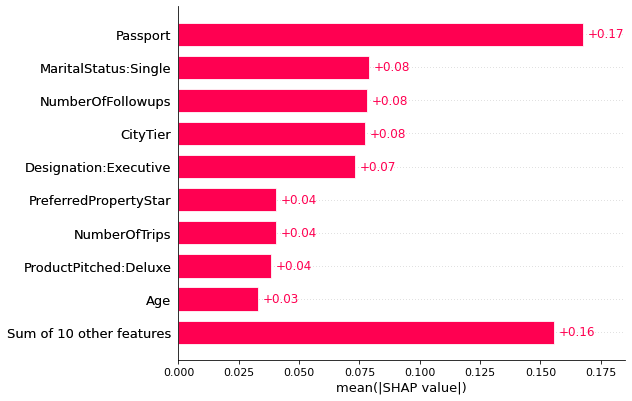

In [ ]:
# Global bar plot
shap.plots.bar(shap_values)

Pada plot di atas, feature diurutkan dari yang berpengaruh paling tinggi hingga paling rendah pada prediksi model baik kejadian ProdTaken=1 maupun ProdTaken=0 (tanpa mempertimbangkan arah pengaruhnya). Feature yang paling penting dalam model adalah `Passport`, karena memiliki kontribusi dalam prediksi paling besar. 

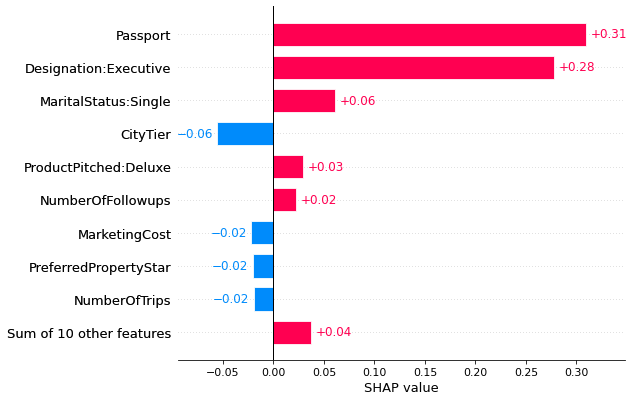

In [ ]:
# Local bar plot (kelas 1 / ProdTaken = 1)
shap.plots.bar(shap_values[0])

Plot ini menunjukkan feature paling penting yang berkontribusi dalam prediksi terjualnya paket liburan (`ProdTaken`=1) adalah `Passport` dan `Designation:Executive`.

### **Business Insights:**
1. Kriteria calon customer yang perlu diprioritaskan :
  *   Customer yang memiliki `Passport`.
  *   Customer dengan status lajang (`MaritalStatus` = Single).
  *   Customer memiliki jabatan executive (`Designation` = Executive)
  *   Customer inggal di daerah dengan `CityTier` =3
  *   Customer termasuk ke dalam kelompok usia Prime Working Age yang berkisar di antara 25 - 54 tahun.

2. Kecil kemungkinan customer untuk membeli produk Deluxe, Super Deluxe, dan King, sehingga untuk kedepannya produk yang ditawarkan dapat dimulai dari harga produk terendah, kemudian dilakukan follow up dengan menawarkan produk yang memiliki harga lebih tinggi. Karena semakin sering dilakukan follow up maka semakin besar peluang customer membeli produk.


## **Feature Selection**

Pemodelan menggunakan feature yang paling penting berdasarkan evaluasi performance model_xgb pada global bar plot shap value. Lima feature paling penting yaitu :
`Passport`, `MaritalStatus:Single`, `NumberOfFollowups`, `CityTier`, `Designation:Executive`.

Pemodelan menggunakan XGBoost classifier dan feature terpenting menghasilkan performa model yang tidak jauh berbeda dengan model yang menggunakan 19 feature. Hal ini berarti model_xgb_fs merupakan model prediktif yang lebih baik karena secara kompleksitas model jauh lebih sederhana, namun performa model masih tergolong baik.

In [ ]:
y_train_fs = train.ProdTaken
X_train_fs = train.filter(['Passport', 'MaritalStatus:Single', 'NumberOfFollowups', 'CityTier', 'Designation:Executive'])

y_test_fs = test.ProdTaken
X_test_fs = test.filter(['Passport', 'MaritalStatus:Single', 'NumberOfFollowups', 'CityTier', 'Designation:Executive'])

X_train_fs.shape, X_test_fs.shape, y_train_fs.shape, y_test_fs.shape

((6186, 5), (1584, 5), (6186,), (1584,))

In [ ]:
from xgboost import XGBClassifier
model_xgb_fs = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb_fs, X_train_fs, y_train_fs, scoring='roc_auc', cv=cv)
scores.mean()

0.9127442426649738

In [ ]:
model_xgb_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = model_xgb_fs.predict(X_test_fs)
eval_classification(model_xgb_fs, y_pred_fs, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.85

Precision (Test Set): 0.89
Recall (Test Set): 0.80
F1-Score (Test Set): 0.84
AUC: 0.85


In [ ]:
model_xgb_fs.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(model_xgb_fs.score(X_train_fs, y_train_fs)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(model_xgb_fs.score(X_test_fs[X_train_fs.columns], y_test_fs)))

y_pred_fs = model_xgb_fs.predict(X_test_fs)
print(classification_report(y_test_fs, y_pred_fs))

Accuracy of XGB classifier on training set: 0.86
Accuracy of XGB classifier on test set: 0.85
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       792
         1.0       0.89      0.80      0.84       792

    accuracy                           0.85      1584
   macro avg       0.85      0.85      0.85      1584
weighted avg       0.85      0.85      0.85      1584



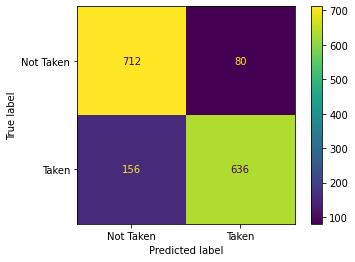

In [ ]:
plot_confusion_matrix(model_xgb_fs,
                     X_test_fs,
                     y_test_fs,
                     values_format='d',
                     display_labels=["Not Taken", "Taken"])

In [ ]:
y_pred_proba_fs = model_xgb_fs.predict_proba(X_test_fs)
y_pred_proba_fs = y_pred_proba_fs[:][:,1]

# dataframe ground truth and probability
y_test_fs_temp = y_test_fs.copy()
y_test_fs_temp.reset_index(drop=True, inplace=True)
y_pred_proba_fs = pd.concat([y_test_fs_temp, pd.DataFrame(y_pred_proba_fs)], axis=1)

y_pred_proba_fs.columns = ['y_test_actual', 'y_pred_proba']
y_pred_proba_fs.index = X_test_fs.index

Text(0, 0.5, 'True Positive Rate')

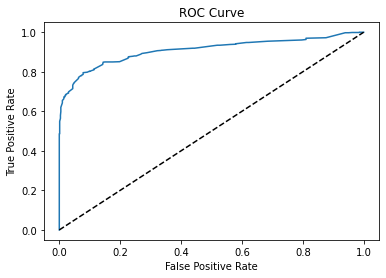

In [ ]:
fpr, tpr, thresholds = roc_curve(y_pred_proba_fs['y_test_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle='--', color='k')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

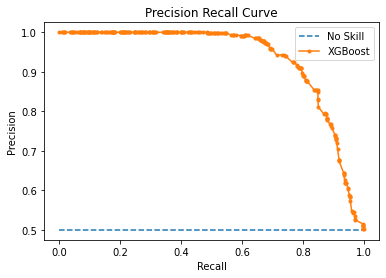

In [ ]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
no_skill = len(y_test_fs[y_test_fs == 1]) / len(y_test_fs)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')

precision, recall, thresholds = precision_recall_curve(y_pred_proba_fs['y_test_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

### **Threshold Tuning**

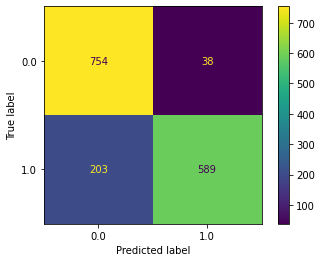

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
t = 0.65
y_pred_proba_fs['y_test_pred'] = np.where(y_pred_proba_fs['y_pred_proba'] > t, 1, 0)
ConfusionMatrixDisplay.from_predictions(y_test_fs, y_pred_proba_fs['y_test_pred'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fs, y_pred_proba_fs['y_test_pred']))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       792
         1.0       0.94      0.74      0.83       792

    accuracy                           0.85      1584
   macro avg       0.86      0.85      0.85      1584
weighted avg       0.86      0.85      0.85      1584



Meningkatkan threshold klasifikasi akan menurunkan total False Negative, dan menaikkan total False Negative. Berdasarkan precision recall score, nilai precision 0.94 berarti setiap 20 customer yang terprediksi potensial terdapat 1 yang sebenarnya tidak potensial. Model mampu memprediksi hingga 74% dari customer potensial yang ada untuk dilakukan pitching, dengan resiko cost marketing akibat kesalahan pitching sebesar 5%.

In [ ]:
# save model
import pickle
best_model = "model_xgb_fs.pkl"  

with open(best_model, 'wb') as file:  
    pickle.dump(model_xgb_fs, file)